<a href="https://colab.research.google.com/github/duyguaran/graduation_thesis/blob/main/fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive #connected my drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import os  #created kaggle file on mydrive for connect kaggle 

#os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [ ]:
#%cd /content/drive/MyDrive/kaggle


/content/drive/MyDrive/kaggle


In [ ]:
#!kaggle datasets download -d   moltean/fruits #downloaded fruit data by using Copy API command  from kaggle 

100% 757M/760M [00:09<00:00, 102MB/s] 
100% 760M/760M [00:09<00:00, 84.0MB/s]


In [ ]:
#unzipping the zip files and deleting the zip files
#!unzip \*.zip  && rm *.zip


In [18]:
import warnings 

In [19]:
warnings.filterwarnings('ignore')
from subprocess import check_output
print(check_output(["ls", "/content/drive/MyDrive/kaggle/fruits-360"]).decode("utf8"))

LICENSE
papers
readme.md
Test
test-multiple_fruits
Training



In [20]:
train='/content/drive/MyDrive/kaggle/fruits-360/Training/'
test='/content/drive/MyDrive/kaggle/fruits-360/Test/'

In [21]:
import numpy as np # linear algebra
import pandas as pd
from glob import glob
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from PIL import Image as im
from tensorflow.keras import layers,models
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [22]:
X_train_img=np.array(glob(train+'/**/*.jpg',recursive=True)) #data preprocing görüntü pixellerini numpy arrayine yerleştiriyoruz işlemleri dhaa hızlı yapabilmek iin
X_test_img=np.array(glob(test+'/**/*.jpg',recursive=True)) # 2 dk 8 sn

In [23]:
y_train=[]
for x in X_train_img:
    y_train.append(x.split('/')[6])
y_train=pd.DataFrame(data=y_train,columns=['test'])

In [24]:
len(X_train_img)

67692

In [25]:
y_test=[]
for y in X_test_img:
    y_test.append(y.split('/')[6])
y_test=pd.DataFrame(y_test,columns=['test'])

In [26]:
y_train.nunique()

test    1
dtype: int64

In [27]:
k=pd.concat([y_train.test,y_test.test])
z=LabelEncoder()
p=z.fit_transform(k)
classifier=[[a,b] for a,b in zip(pd.DataFrame(p)[0].unique(),k.unique())]
y_train=p[:len(y_train)]
y_test=p[len(y_train):]

In [29]:
cv2.imread(X_train_img[1100]).shape #All the images have same size

(100, 100, 3)

In [30]:
X_train=[]
X_test=[]

In [ ]:
for i in range(len(X_train_img)):
    X_train.append(cv2.imread(X_train_img[i]))

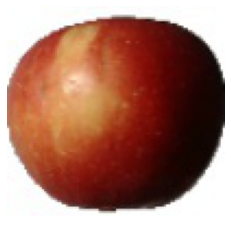

In [ ]:
img = load_img(train + "Apple Braeburn/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()

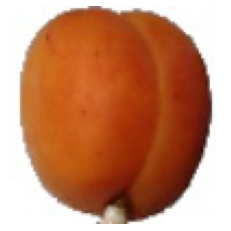

In [ ]:
img1 = load_img(test + "Apricot/321_100.jpg", target_size=(100,100))
plt.imshow(img1)
plt.axis("off")
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from PIL import Image 
from glob import glob

In [ ]:
import numpy as np # linear algebra
import pandas as pd
from glob import glob
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from PIL import Image as im
from tensorflow.keras import layers,models
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [ ]:
#training and testing data information
import os, os.path
train_categories = []
train_samples = []
for i in os.listdir("/content/drive/MyDrive/kaggle/fruits-360/Training/"):
    train_categories.append(i)
    train_samples.append(len(os.listdir("/content/drive/MyDrive/kaggle/fruits-360/Training/"+ i)))

test_categories = []
test_samples = []
for i in os.listdir("/content/drive/MyDrive/kaggle/fruits-360/Test/"):
    test_categories.append(i)
    test_samples.append(len(os.listdir("/content/drive/MyDrive/kaggle/fruits-360/Test/"+i)))

    
print("Count of Fruits in Training set:", sum(train_samples))
print("Count of Fruits in Set set:", sum(test_samples))

Count of Fruits in Training set: 15282
Count of Fruits in Set set: 22688


In [ ]:
import matplotlib.pyplot as plt

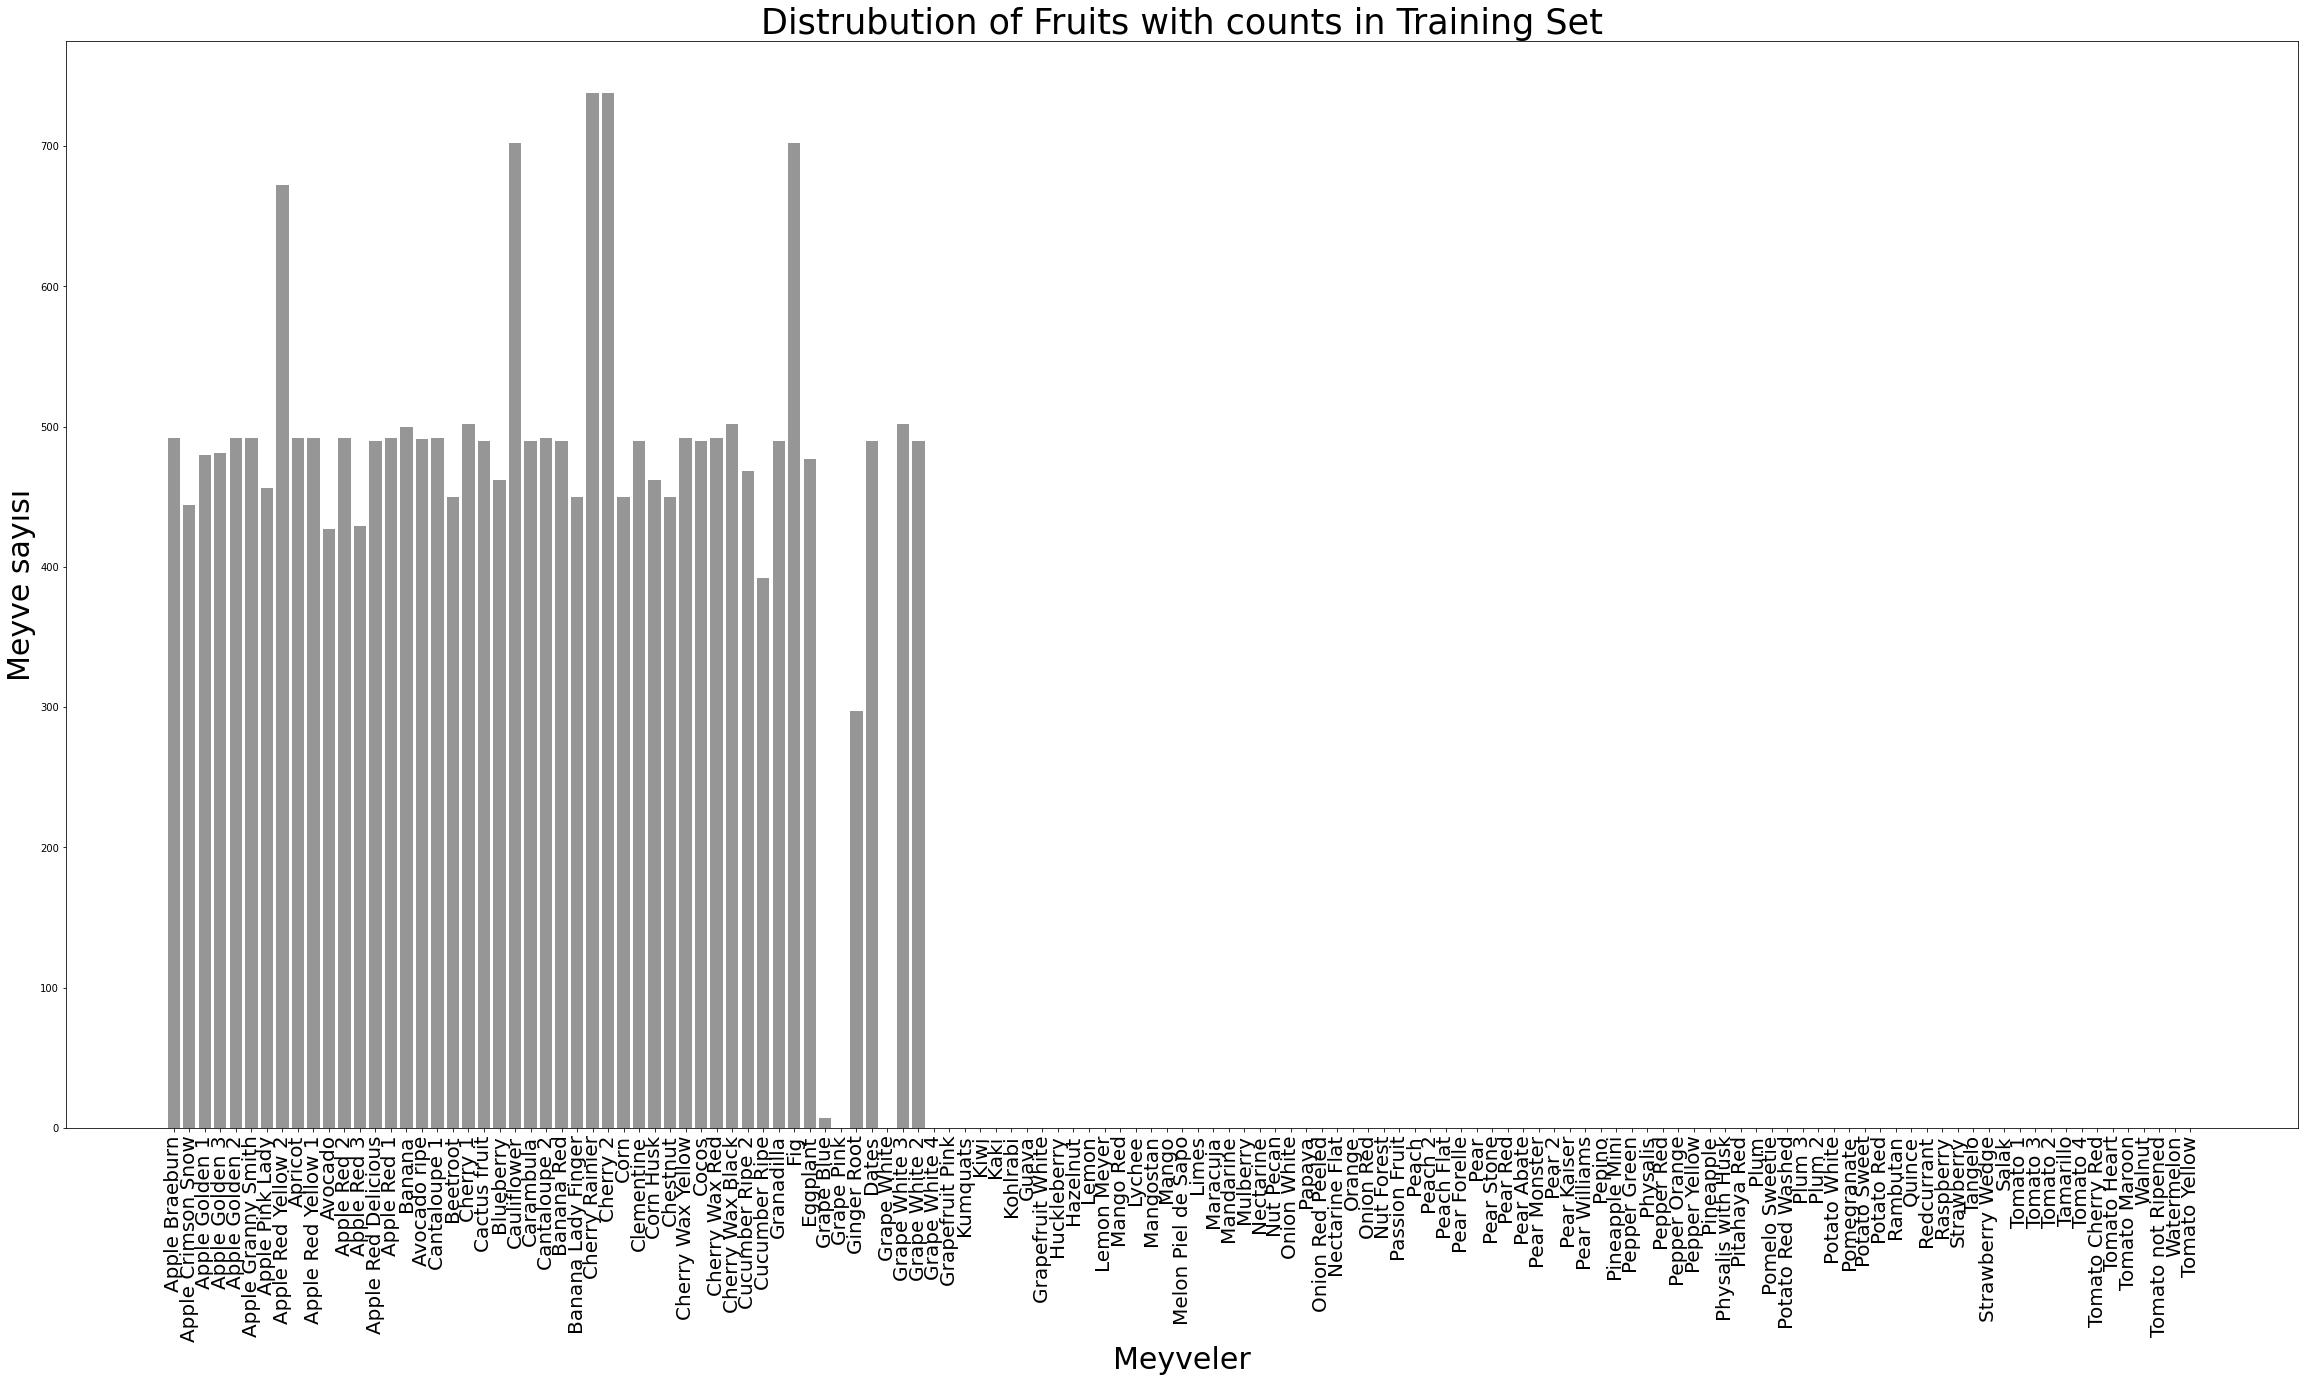

In [ ]:
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 40
figure_size[1] = 20
plt.rcParams["figure.figsize"] = figure_size
index = np.arange(len(train_categories))
plt.bar(index, train_samples, color="#969696")
plt.xlabel('Meyveler', fontsize=30)
plt.ylabel('Meyve sayısı', fontsize=30)
plt.xticks(index, train_categories, fontsize=20, rotation=90)
plt.title('Distrubution of Fruits with counts in Training Set', fontsize=35)
plt.show() # distribution of uploaded training data

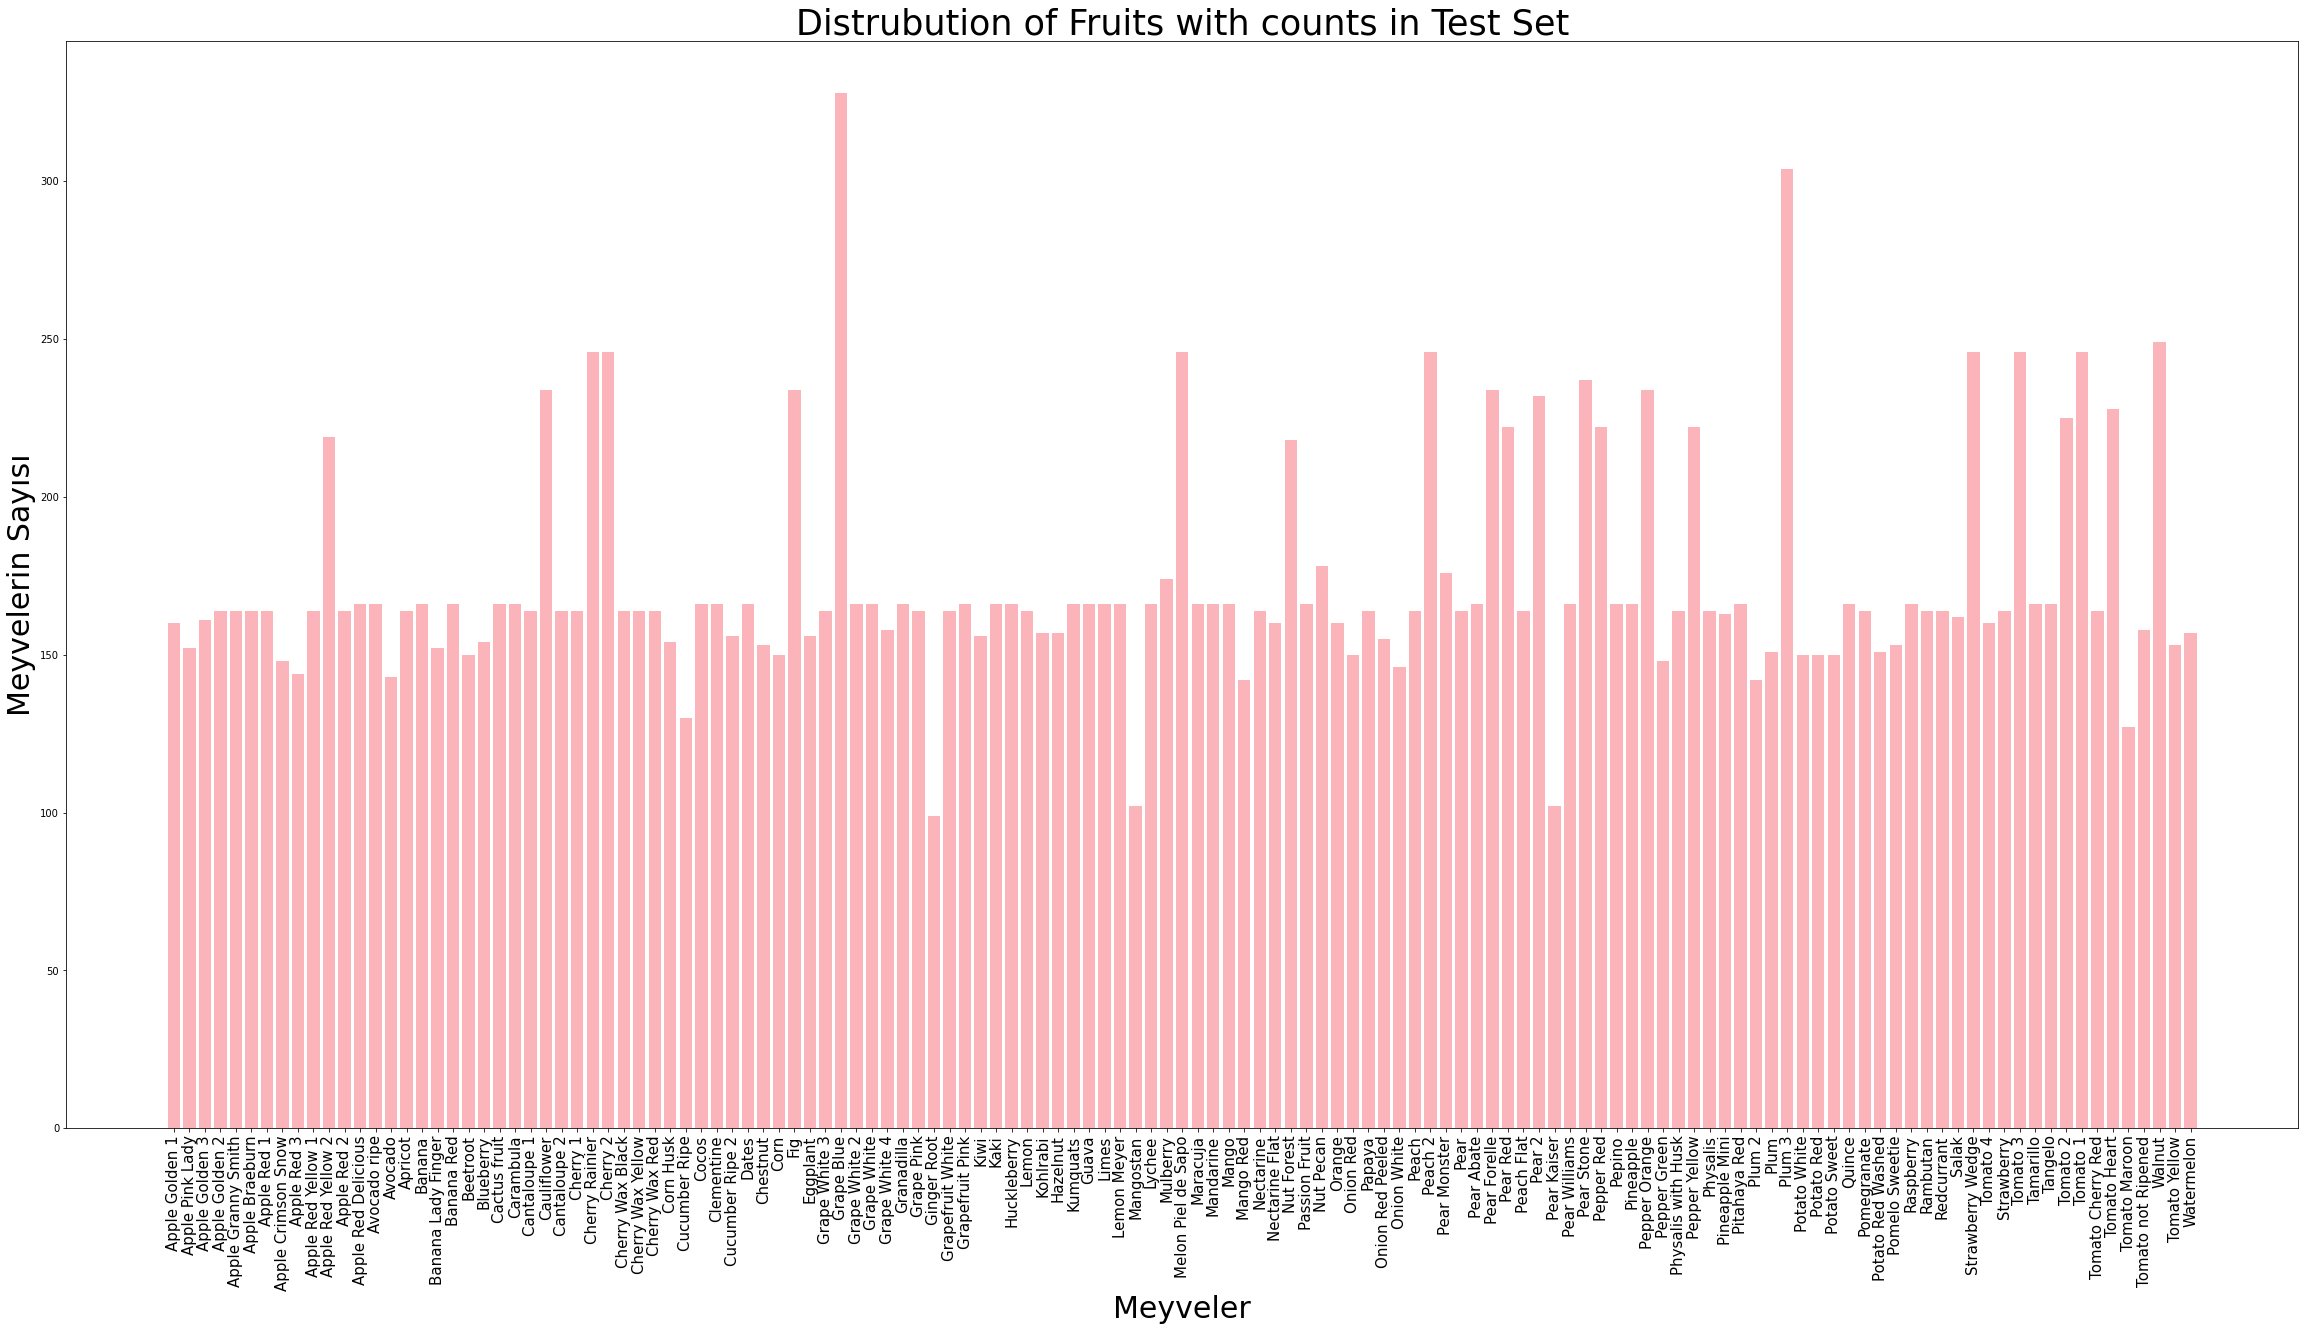

In [ ]:
index2 = np.arange(len(test_categories))
plt.bar(index2, test_samples, color="#fbb4b9")
plt.xlabel('Meyveler', fontsize=30)
plt.ylabel('Meyvelerin Sayısı', fontsize=30)
plt.xticks(index2, test_categories, fontsize=15, rotation=90)
plt.title('Distrubution of Fruits with counts in Test Set', fontsize=35)
plt.show() # distribution of uploaded testing data


In [ ]:
import pandas as pd
from pathlib import Path

In [ ]:
train_dir = Path('/content/drive/MyDrive/graduation/fruits-360/Training')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))
test_dir = Path('/content/drive/MyDrive/graduation/fruits-360/Testing')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [ ]:
def proc_img(filepath):
    
    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')
    df = pd.concat([filepath, labels], axis=1)
    df = df.sample(frac=1).reset_index(drop = True)
    return df

train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)

print(f'Goruntulerin sayısı: {train_df.shape[0]}\n')
print(f'Farklı etiketlerin sayısı: {len(train_df.Label.unique())}\n')
print(f'Etiketler: {train_df.Label.unique()}')

Goruntulerin sayısı: 22953

Farklı etiketlerin sayısı: 47

Etiketler: ['Chestnut' 'Cherry Wax Yellow' 'Cauliflower' 'Apricot' 'Corn Husk'
 'Cherry Rainier' 'Apple Golden 2' 'Apple Red 1' 'Apple Crimson Snow'
 'Cherry Wax Red' 'Cantaloupe 2' 'Blueberry' 'Cherry 1' 'Avocado ripe'
 'Apple Red Yellow 1' 'Apple Red 2' 'Cactus fruit' 'Apple Golden 1'
 'Cherry 2' 'Avocado' 'Cantaloupe 1' 'Carambula' 'Apple Braeburn'
 'Grape White 3' 'Eggplant' 'Clementine' 'Apple Golden 3' 'Banana' 'Dates'
 'Granadilla' 'Banana Lady Finger' 'Apple Red Yellow 2'
 'Apple Red Delicious' 'Banana Red' 'Cocos' 'Apple Granny Smith'
 'Beetroot' 'Cherry Wax Black' 'Apple Pink Lady' 'Fig' 'Cucumber Ripe'
 'Grape White 2' 'Ginger Root' 'Cucumber Ripe 2' 'Apple Red 3' 'Corn'
 'Grape Blue']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
train_df.head() # we can see that which paths the labels are

,Filepath,Label
0,/content/drive/MyDrive/graduation/fruits-360/T...,Chestnut
1,/content/drive/MyDrive/graduation/fruits-360/T...,Cherry Wax Yellow
2,/content/drive/MyDrive/graduation/fruits-360/T...,Cauliflower
3,/content/drive/MyDrive/graduation/fruits-360/T...,Apricot
4,/content/drive/MyDrive/graduation/fruits-360/T...,Corn Husk


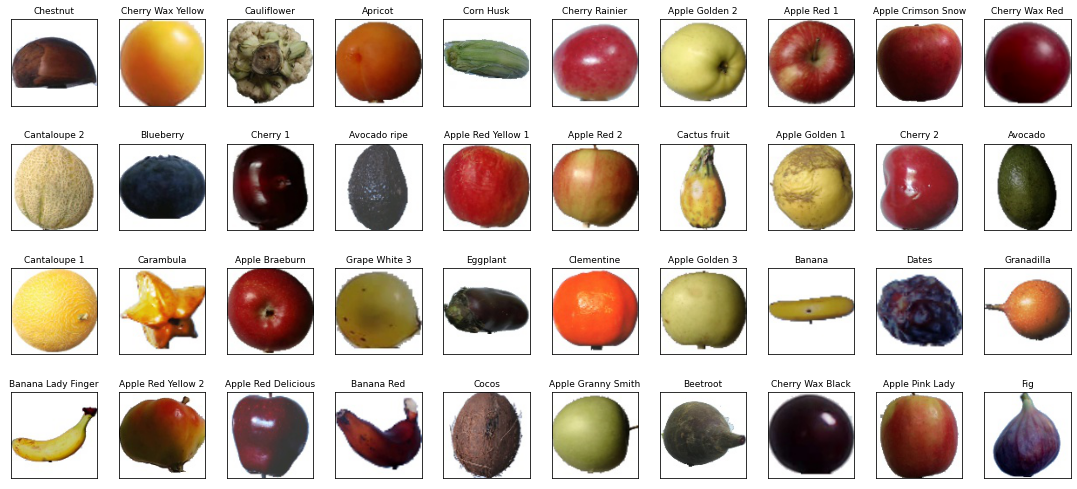

In [ ]:
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index() #df with a Label of each category
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7), # we can see that some images of the dataset
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 9)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
from sklearn.datasets import load_files